# Lesson 1: Data Analysis Process

## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

# with open('enrollments.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     enrollments = list(reader)

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

# with open('daily_engagement.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     daily_engagement = list(reader)
    
# with open('project_submissions.csv', 'rb') as f:
#     reader = unicodecsv.DictReader(f)
#     project_submissions = list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [6]:
for record in daily_engagement:
    if record['total_minutes_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0
        
daily_engagement[0]

{u'acct': u'0',
 'has_visited': 1,
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

print 'number of rows in enrollments = ', len(enrollments), '\n', \
'number of rows in daily_engagement = ', len(daily_engagement), '\n', \
'number of rows in project_submissions', len(project_submissions), '\n'

from sets import Set

# enrollments_set = Set([])
# for enrollment in enrollments:
#     enrollments_set.add(enrollment[u'account_key'])

#daily_engagement_set = Set([])
#for engagement_record in daily_engagement:
#    daily_engagement_set.add(engagement_record[u'acct'])

# project_submissions_set = Set([])
# for submission in project_submissions:
#     project_submissions_set.add(submission[u'account_key'])
    
def make_set_unique_values(table, key_name):
    values_set = Set([])
    for row in table:
        values_set.add(row[key_name])
    return values_set

enrollments_set = make_set_unique_values(enrollments, 'account_key')
project_submissions_set = make_set_unique_values(project_submissions, 'account_key')
daily_engagement_set = make_set_unique_values(daily_engagement, 'acct')

print 'number of unique account_keys in enrollments = ', len(enrollments_set), '\n', \
'number of unique accts in daily_engagement = ', len(daily_engagement_set), '\n', \
'number of unique account_keys in project_submissions', len(project_submissions_set)

number of rows in enrollments =  1640 
number of rows in daily_engagement =  136240 
number of rows in project_submissions 3642 

number of unique account_keys in enrollments =  1302 
number of unique accts in daily_engagement =  1237 
number of unique account_keys in project_submissions 743


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: the sets module is deprecated


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

daily_engagement[0]['account_key']

print 'number of rows in enrollments = ', len(enrollments), '\n', \
'number of rows in daily_engagement = ', len(daily_engagement), '\n', \
'number of rows in project_submissions', len(project_submissions), '\n'

print 'number of unique account_keys in enrollments = ', len(enrollments_set), '\n', \
'number of unique account_keys in daily_engagement = ', len(daily_engagement_set), '\n', \
'number of unique account_keys in project_submissions', len(project_submissions_set)

number of rows in enrollments =  1640 
number of rows in daily_engagement =  136240 
number of rows in project_submissions 3642 

number of unique account_keys in enrollments =  1302 
number of unique account_keys in daily_engagement =  1237 
number of unique account_keys in project_submissions 743


## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

# NOTES:
# The engagement table should include a row for each day that each student is enrolled even if the
# student didn't visit the site at all that day. SO there should have been the same number of
# unique students in both the engagement and enrollment tables.

print 'number of missing engagement records = ', len(enrollments_set) - len(daily_engagement_set)

# There are 1302 - 1237 = 65 account keys missing from the engagement tables.

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

for enrollments_acc_key in enrollments_set:
    key_missing = True
    for daily_engagement_acc_key in daily_engagement_set:
        if enrollments_acc_key == daily_engagement_acc_key:
            key_missing = False
            break
    if key_missing:
        break
print "first missing account key = ", enrollments_acc_key

for enrollment in enrollments:
    if enrollment['account_key'] == enrollments_acc_key:
        break
enrollment

number of missing engagement records =  65
first missing account key =  1145


{u'account_key': u'1145',
 u'cancel_date': datetime.datetime(2015, 4, 4, 0, 0),
 u'days_to_cancel': 0,
 u'is_canceled': True,
 u'is_udacity': False,
 u'join_date': datetime.datetime(2015, 4, 4, 0, 0),
 u'status': u'canceled'}

## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

set_missing_records = Set([])
for enrollments_acc_key in enrollments_set:
    key_missing = True
    for daily_engagement_acc_key in daily_engagement_set:
        if enrollments_acc_key == daily_engagement_acc_key:
            key_missing = False
            break
    if key_missing:
        set_missing_records.add(enrollments_acc_key)
print 'number missing records = ', len(set_missing_records), '\n'

count_problem_records = 0
for account_key in set_missing_records:
    for enrollment in enrollments:
        if enrollment['account_key'] == account_key and enrollment['cancel_date'] != enrollment['join_date']:
            for key in enrollment:
                print key, ':', enrollment[key]
            print '\n'
            count_problem_records += 1
count_problem_records

#print "number of missing account key where cancel and join dates don't match = ", count_weird_records
#print "last missing account key where cancel and join dates don't match = ", enrollments_acc_key


number missing records =  65 

status : canceled
is_udacity : True
is_canceled : True
join_date : 2015-01-10 00:00:00
account_key : 1304
cancel_date : 2015-03-10 00:00:00
days_to_cancel : 59


status : canceled
is_udacity : True
is_canceled : True
join_date : 2015-03-10 00:00:00
account_key : 1304
cancel_date : 2015-06-17 00:00:00
days_to_cancel : 99


status : current
is_udacity : True
is_canceled : False
join_date : 2015-02-25 00:00:00
account_key : 1101
cancel_date : None
days_to_cancel : None




3

## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = dict([])
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel']==None or enrollment['days_to_cancel']>7:
        if enrollment['account_key'] not in paid_students \
        or enrollment['join_date'] > paid_students[enrollment['account_key']]:
            paid_students[enrollment['account_key']] = enrollment['join_date']
        
len(paid_students)

995

## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []

#for engagement in non_udacity_engagement:
#    if engagement['account_key'] in paid_students \
#    and within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
#        paid_engagement_in_first_week.append(engagement)

for engagement in paid_engagement:
    if within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

1293
134549
3618


6919

## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

#engagement_by_account = defaultdict(list)
#for engagement_record in paid_engagement_in_first_week:
#    account_key = engagement_record['account_key']
#    engagement_by_account[account_key].append(engagement_record)
    
def group_data(list_of_dict, key_name):
    grouped_data = defaultdict(list)
    for record in list_of_dict:
        grouped_data[record[key_name]].append(record)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

#total_minutes_by_account = {}
#for account_key, engagement_for_student in engagement_by_account.items():
#    total_minutes = 0
#    for engagement_record in engagement_for_student:
#        total_minutes += engagement_record['total_minutes_visited']
#    total_minutes_by_account[account_key] = total_minutes
    
def total_x_by_account(x, dict_of_list_of_dict):
    total_by_account = {}
    for account_key, record_for_student in dict_of_list_of_dict.items():
        total_by_account[account_key] = 0
        for record in record_for_student:
            total_by_account[account_key] += record[x]
    return total_by_account
total_minutes_by_account = total_x_by_account('total_minutes_visited', engagement_by_account)

In [19]:
import numpy as np

# Summarize the data about minutes spent in the classroom

#total_minutes = total_minutes_by_account.values()
#print 'Mean:', np.mean(total_minutes)
#print 'Standard deviation:', np.std(total_minutes)
#print 'Minimum:', np.min(total_minutes)
#print 'Maximum:', np.max(total_minutes)

def print_distribution_characteristics(dict_of_totals):
    list_of_totals = dict_of_totals.values()
    print 'Mean:', np.mean(list_of_totals)
    print 'Standard deviation:', np.std(list_of_totals)
    print 'Minimum:', np.min(list_of_totals)
    print 'Maximum:', np.max(list_of_totals)

print_distribution_characteristics(total_minutes_by_account)


Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

minutes_in_a_day = 24*60 # = 1440
minutes_in_a_week = 7*24*60 # = 10080
strange_accounts = []
for account_key, total_minutes in total_minutes_by_account.items():
    if total_minutes > minutes_in_a_week:
        strange_accounts.append(account_key)
        break
#len(strange_accounts) # = 1
#account_key # = u'108'
#total_minutes_by_account['108']
engagement_by_account['108']

# enrollment records for the strange_account
#for enrollment in non_udacity_enrollments:
#    if enrollment['account_key']=='108':
#        print enrollment
#{u'status': u'canceled',
# u'is_udacity': False,
# u'is_canceled': True,
# u'join_date': datetime.datetime(2015, 1, 7, 0, 0),
# u'account_key': u'108',
# u'cancel_date': datetime.datetime(2015, 4, 20, 0, 0),
# u'days_to_cancel': 103}
#{u'status': u'canceled',
# u'is_udacity': False,
# u'is_canceled': True,
# u'join_date': datetime.datetime(2015, 4, 20, 0, 0),
# u'account_key': u'108',
# u'cancel_date': datetime.datetime(2015, 5, 14, 0, 0),
# u'days_to_cancel': 24}

[{'account_key': u'108',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 25.9137858334,
  u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)},
 {'account_key': u'108',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 0,
  u'total_minutes_visited': 3.40682316667,
  u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)},
 {'account_key': u'108',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 2,
  u'projects_completed': 0,
  u'total_minutes_visited': 99.1186611667,
  u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)},
 {'account_key': u'108',
  'has_visited': 1,
  u'lessons_completed': 0,
  u'num_courses_visited': 1,
  u'projects_completed': 2,
  u'total_minutes_visited': 35.8316206667,
  u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)},
 {'account_key': u'108',
  'has_visited': 0,
  u'lessons_completed': 0,
  u'num_courses_visited'

## Lessons Completed in First Week

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = total_x_by_account('lessons_completed', engagement_by_account)
print_distribution_characteristics(total_lessons_by_account)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

#working_days_in_first_week = {}
#for account_key, engagement_for_student in engagement_by_account.items():
#    working_days_in_first_week[account_key] = 0
#    for engagement_record in engagement_for_student:
#        if engagement_record['total_minutes_visited'] > 0:
#            working_days_in_first_week[account_key] += 1

working_days_in_first_week = total_x_by_account('has_visited', engagement_by_account)
print_distribution_characteristics(working_days_in_first_week)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [23]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_values = ['PASSED', 'DISTINCTION']

#paid_engagement_in_first_week[0]
#'account_key': u'0',
#'has_visited': 1,
#'lessons_completed': 0,
#'num_courses_visited': 1,
#'projects_completed': 0,
#'total_minutes_visited': 11.6793745,
#'utc_date': datetime.datetime(2015, 1, 9, 0, 0)

#paid_submissions[0]
#'account_key': u'256',
#'assigned_rating': u'UNGRADED',
#'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
#'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
#'lesson_key': u'3176718735',
#'processing_state': u'EVALUATED'

# assigned_rating:
#    This column has 4 possible values:
#        blank - Project has not yet been evaluated.
#        INCOMPLETE - Project did not meet specifications.
#        PASSED - Project met specifications.
#        DISTINCTION - Project exceeded specifications.
#        UNGRADED - The submission could not be evaluated (e.g. contained a corrupted file)
students_who_pass = Set([])
for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and submission['assigned_rating'] in pass_values:
        students_who_pass.add(submission['account_key'])
print len(students_who_pass)

passing_engagement = []
non_passing_engagement = []
for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] in students_who_pass:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
print len(passing_engagement), len(non_passing_engagement)

647
4527 2392


## Comparing the Two Student Groups

In [24]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

engagement_by_account_pass = group_data(passing_engagement, 'account_key')
engagement_by_account_fail = group_data(non_passing_engagement, 'account_key')

minutes_in_class_pass = total_x_by_account('total_minutes_visited', engagement_by_account_pass)
print '\n', "minutes in class for those who pass"
print_distribution_characteristics(minutes_in_class_pass)
minutes_in_class_fail = total_x_by_account('total_minutes_visited', engagement_by_account_fail)
print '\n', "minutes in class for those who don't pass"
print_distribution_characteristics(minutes_in_class_fail)

number_of_lessons_completed_pass = total_x_by_account('lessons_completed', engagement_by_account_pass)
print '\n', "number of lessons for those who pass"
print_distribution_characteristics(number_of_lessons_completed_pass)
number_of_lessons_completed_fail = total_x_by_account('lessons_completed', engagement_by_account_fail)
print '\n', "number of lessons for those who don't pass"
print_distribution_characteristics(number_of_lessons_completed_fail)

days_visited_pass = total_x_by_account('has_visited', engagement_by_account_pass)
print '\n', "number of days visited for those who pass"
print_distribution_characteristics(days_visited_pass)
days_visited_fail = total_x_by_account('has_visited', engagement_by_account_fail)
print '\n', "number of days visited for those who don't pass"
print_distribution_characteristics(days_visited_fail)


minutes in class for those who pass
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

minutes in class for those who don't pass
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

number of lessons for those who pass
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

number of lessons for those who don't pass
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27

number of days visited for those who pass
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

number of days visited for those who don't pass
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

Populating the interactive namespace from numpy and matplotlib

minutes in class for those who pass


`%matplotlib` prevents importing * from pylab and numpy


(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

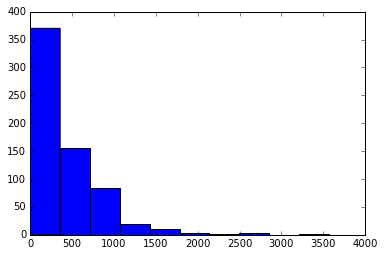

In [25]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline
import matplotlib.pyplot as plt

print '\n', "minutes in class for those who pass"
plt.hist(minutes_in_class_pass.values())


minutes in class for those who don't pass


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

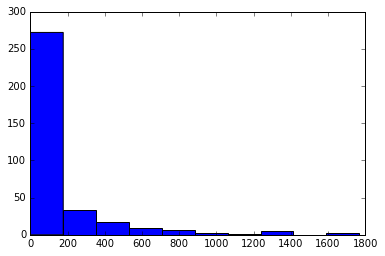

In [26]:
print '\n', "minutes in class for those who don't pass"
plt.hist(minutes_in_class_fail.values())


number of lessons for those who pass


(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

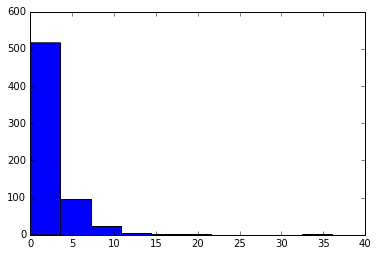

In [27]:
print '\n', "number of lessons for those who pass"
plt.hist(number_of_lessons_completed_pass.values())


number of lessons for those who don't pass


(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

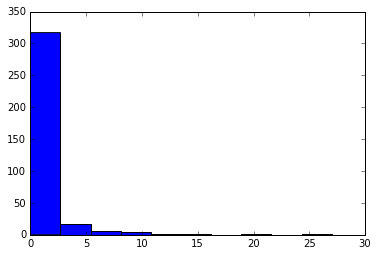

In [28]:
print '\n', "number of lessons for those who don't pass"
plt.hist(number_of_lessons_completed_fail.values())


number of days visited for those who pass


(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

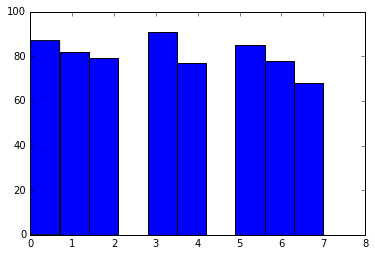

In [29]:
print '\n', "number of days visited for those who pass"
plt.hist(days_visited_pass.values())


number of days visited for those who don't pass


(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

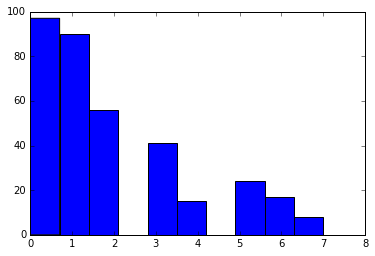

In [30]:
print '\n', "number of days visited for those who don't pass"
plt.hist(days_visited_fail.values())

## Improving Plots and Sharing Findings

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


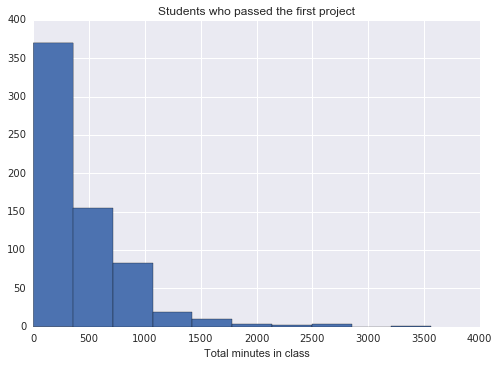

In [31]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(minutes_in_class_pass.values())
plt.xlabel("Total minutes in class")
plt.title("Students who passed the first project")

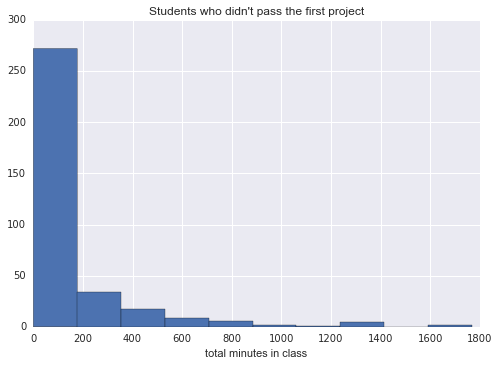

In [32]:
plt.hist(minutes_in_class_fail.values())
plt.xlabel("total minutes in class")
plt.title("Students who didn't pass the first project")

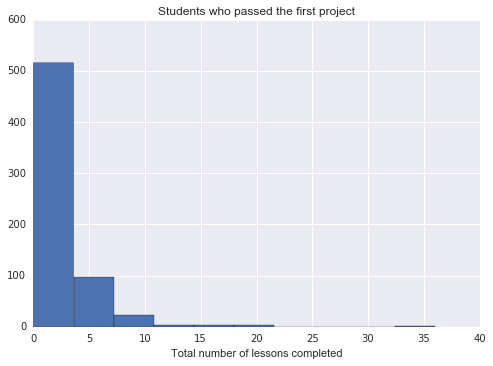

In [33]:
plt.hist(number_of_lessons_completed_pass.values())
plt.xlabel("Total number of lessons completed")
plt.title("Students who passed the first project")

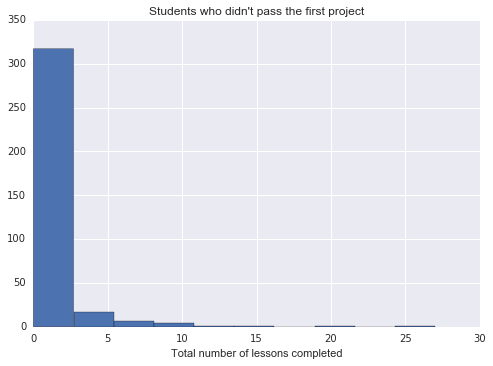

In [34]:
plt.hist(number_of_lessons_completed_fail.values())
plt.xlabel("Total number of lessons completed")
plt.title("Students who didn't pass the first project")

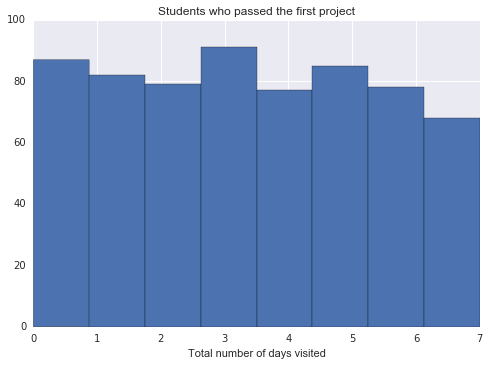

In [35]:
plt.hist(days_visited_pass.values(), bins=8)
plt.xlabel("Total number of days visited")
plt.title("Students who passed the first project")

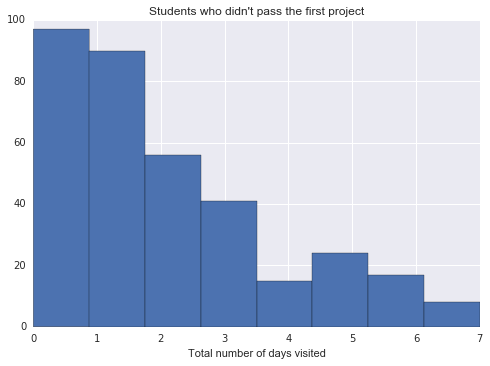

In [36]:
plt.hist(days_visited_fail.values(), bins=8)
plt.xlabel("Total number of days visited")
plt.title("Students who didn't pass the first project")